# Paper Figure Generation

Source code for generating the results figures found in the paper.


In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from collections import defaultdict
from glob import glob
from itertools import chain
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator


In [3]:
def tabulate_events(dpath, tag_prefix="", run=None, steps_per_epoch=None, rename_value_col=None):
    summary_iterators = [
        EventAccumulator(os.path.join(dpath, dname)).Reload() 
        for dname in os.listdir(dpath)
    ]

    df_dict = {
        "Tag": [],
        "wall_time": [],
        "step": [],
        "value": []
    }
    if steps_per_epoch is not None:
        df_dict["Epoch"] = []
    for ea in summary_iterators:
        for tag in ea.Tags()["scalars"]:
            scalar_events = ea.Scalars(tag)
            for scalar_event in scalar_events:
                df_dict["Tag"].append(tag_prefix + tag)
                df_dict["wall_time"].append(scalar_event.wall_time)
                df_dict["step"].append(scalar_event.step)
                df_dict["value"].append(scalar_event.value)
                if steps_per_epoch is not None:
                    # df_dict["epoch"].append(scalar_event.step // steps_per_epoch)
                    if tag.endswith("/Train"):
                        df_dict["Epoch"].append(float(format(scalar_event.step / steps_per_epoch, ".1f")))
                    elif tag.endswith("/Validation"):
                        df_dict["Epoch"].append(1 + (scalar_event.step // steps_per_epoch))

    if run is not None:
        df_dict["Run"] = [run,] * len(df_dict["Tag"])
        
    if rename_value_col is not None:
        df_dict[rename_value_col] = df_dict.pop("value")

    return pd.DataFrame.from_dict(df_dict)    

In [4]:
spe = 2794
rvc = "BCEWithLogitsLoss"
df = pd.concat([
    tabulate_events("./runs/resnet34.1/", tag_prefix="ResNet34/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet34.2/", tag_prefix="ResNet34/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet34.3/", tag_prefix="ResNet34/", run="3", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.1/", tag_prefix="ResNet50/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.2/", tag_prefix="ResNet50/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.3/", tag_prefix="ResNet50/", run="3", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.1/", tag_prefix="ResNet101/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.2/", tag_prefix="ResNet101/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.3/", tag_prefix="ResNet101/", run="3", steps_per_epoch=spe, rename_value_col=rvc),

    tabulate_events("./runs/resnet34.1.pos/", tag_prefix="ResNet34.Pos/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet34.2.pos/", tag_prefix="ResNet34.Pos/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet34.3.pos/", tag_prefix="ResNet34.Pos/", run="3", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.1.pos/", tag_prefix="ResNet50.Pos/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.2.pos/", tag_prefix="ResNet50.Pos/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet50.3.pos/", tag_prefix="ResNet50.Pos/", run="3", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.1.pos/", tag_prefix="ResNet101.Pos/", run="1", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.2.pos/", tag_prefix="ResNet101.Pos/", run="2", steps_per_epoch=spe, rename_value_col=rvc),
    tabulate_events("./runs/resnet101.3.pos/", tag_prefix="ResNet101.Pos/", run="3", steps_per_epoch=spe, rename_value_col=rvc),
])
# drop epochs greater than 5
df = df[df["Epoch"] <= 5]
df

,Tag,wall_time,step,Epoch,Run,BCEWithLogitsLoss
0,ResNet34/Loss/Train,1.575394e+09,2,0.0,1,0.781557
1,ResNet34/Loss/Train,1.575394e+09,5,0.0,1,0.732794
2,ResNet34/Loss/Train,1.575394e+09,7,0.0,1,0.704895
3,ResNet34/Loss/Train,1.575394e+09,10,0.0,1,0.669295
4,ResNet34/Loss/Train,1.575394e+09,15,0.0,1,0.605671
...,...,...,...,...,...,...
11470,ResNet101.Pos/Loss/Validation,1.575631e+09,11466,5.0,3,0.399246
11471,ResNet101.Pos/Loss/Validation,1.575631e+09,11467,5.0,3,0.347814
11472,ResNet101.Pos/Loss/Validation,1.575631e+09,11468,5.0,3,0.223839
11473,ResNet101.Pos/Loss/Validation,1.575631e+09,11469,5.0,3,0.592384


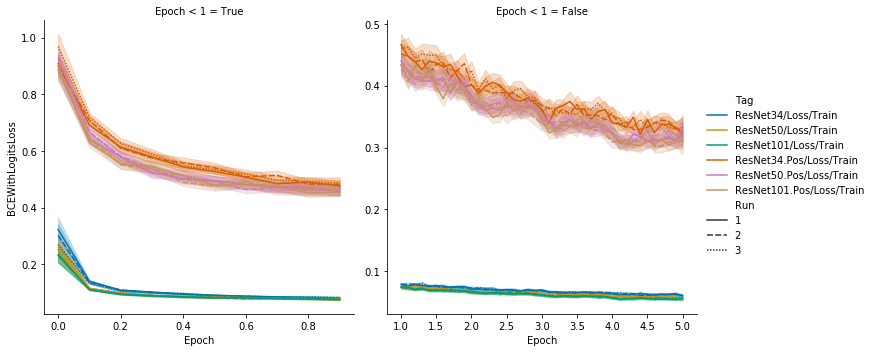

In [9]:
# plt.figure(figsize=(16, 6))
# fig, ax = plt.subplots(figsize=(16, 10))

# ax = sns.lineplot(x="epoch", y="value", hue="tag", style="run", data=df)

# ax = sns.lineplot(x="Epoch", y="BCEWithLogitsLoss", hue="Tag", style="Run", markers=False, palette="colorblind", data=df[df["Tag"].str.endswith("Train")])
df["Epoch < 1"] = df["Epoch"]  < 1

ax = sns.relplot(
    x="Epoch",
    y="BCEWithLogitsLoss",
    hue="Tag",
    style="Run",
    kind="line",
    ci=95,
    markers=False,
    palette="colorblind",
    col="Epoch < 1",
    facet_kws=dict(sharex=False, sharey=False),
    col_order=[True, False],
    data=df[df["Tag"].str.endswith("Train")]
)
# ax.savefig("train_loss_epoch.pdf")
ax.savefig("train_loss_epoch.png", dpi=200)

<Figure size 1152x432 with 0 Axes>

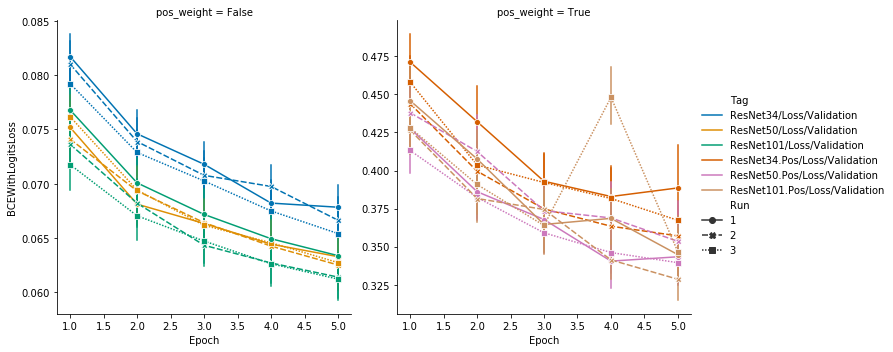

In [10]:
plt.figure(figsize=(16, 6))
# fig, ax = plt.subplots(figsize=(16, 10))

# only lineplot the training loss
# ax = sns.lineplot(x="epoch", y="value", hue="tag", style="run", data=df[df["tag"].str.endswith("Train")])
# sns.lineplot(x="Epoch", y="BCEWithLogitsLoss", hue="Tag", style="Run", err_style="bars", markers=False, palette="colorblind", data=df[df["Tag"].str.endswith("Validation")])
df['pos_weight'] = np.where(df['Tag'].str.contains(".Pos/"), True, False)
ax = sns.relplot(
    x="Epoch",
    y="BCEWithLogitsLoss",
    hue="Tag",
    style="Run",
    kind="line",
    err_style="bars",
    ci=95,
    markers=True,
    col="pos_weight",
    facet_kws=dict(sharex=True, sharey=False),
    palette="colorblind",
    data=df[df["Tag"].str.endswith("Validation")]
)
# ax.savefig("val_loss_epoch.pdf")
ax.savefig("val_loss_epoch.png", dpi=200)

In [7]:
df.where(df["Tag"].str.endswith("Validation")).groupby(["Tag", "Run"]).min()
# ResNet101.Pos/Loss/Validation 2 	0.030089
# ResNet101/Loss/Validation 3 	0.000912
# ResNet34.Pos/Loss/Validation 3 	0.079299
# ResNet34/Loss/Validation 3 	0.001245
# ResNet50.Pos/Loss/Validation 1 	0.024243
# ResNet50/Loss/Validation 1 	0.019656
df.where(df["Tag"].str.endswith("Validation")).groupby(["Tag", "Run"]).agg({"BCEWithLogitsLoss": [np.min]})

BCEWithLogitsLoss
                                               amin
Tag                           Run                  
ResNet101.Pos/Loss/Validation 1            0.155308
                              2            0.030089
                              3            0.101971
ResNet101/Loss/Validation     1            0.022946
                              2            0.002843
                              3            0.000912
ResNet34.Pos/Loss/Validation  1            0.157775
                              2            0.141943
                              3            0.079299
ResNet34/Loss/Validation      1            0.029124
                              2            0.022541
                              3            0.001245
ResNet50.Pos/Loss/Validation  1            0.024243
                              2            0.158013
                              3            0.128866
ResNet50/Loss/Validation      1            0.019656
                              2            0.020537
                              3            0.021649

In [8]:
# plt.figure(figsize=(16, 10))
# sns.lineplot(x="Step", y="Value", data=df2)